In [30]:

import datetime
import json
import numpy as np
from fbprophet import Prophet
from neuralprophet import NeuralProphet
import pandas as pd
import requests
import matplotlib.pyplot as plt
from fbprophet.plot import plot_cross_validation_metric
import math
from sklearn.model_selection import train_test_split
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=ETH&tsym=USD&limit=180')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'
hist.describe()

,high,low,open,volumefrom,volumeto,close
count,181.000000,181.000000,181.000000,1.810000e+02,1.810000e+02,181.000000
mean,1312.952983,1201.810829,1259.165138,7.837831e+05,9.865727e+08,1269.124365
std,654.064707,602.601691,632.220525,5.281156e+05,7.581432e+08,632.703699
min,392.050000,374.080000,382.830000,1.008079e+05,7.539484e+07,382.760000
25%,614.840000,576.610000,596.930000,4.496165e+05,3.792781e+08,598.260000
50%,1381.530000,1234.880000,1318.470000,6.243270e+05,8.428788e+08,1330.780000
75%,1842.030000,1726.660000,1794.830000,9.640668e+05,1.349158e+09,1795.630000
max,2644.500000,2401.070000,2517.080000,3.649323e+06,3.831992e+09,2517.080000


<AxesSubplot:>

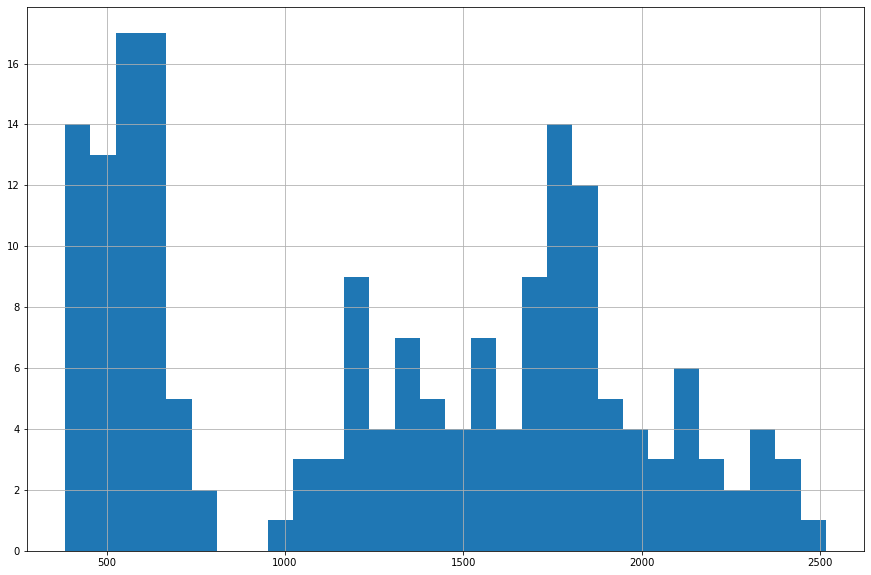

In [31]:
hist['close'].hist(bins=30, figsize=(15,10))

<AxesSubplot:xlabel='time'>

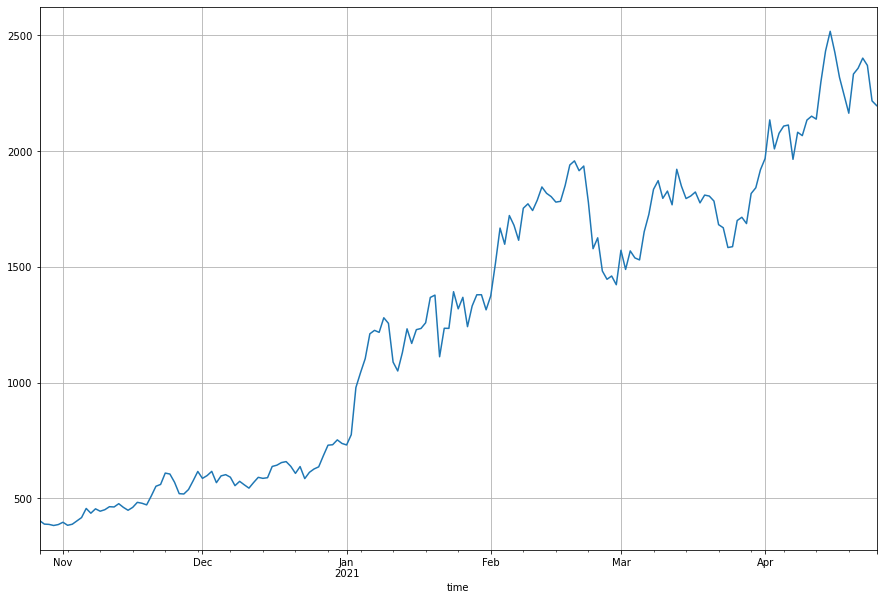

In [32]:
hist['close'].plot(grid=True, figsize=(15, 10))

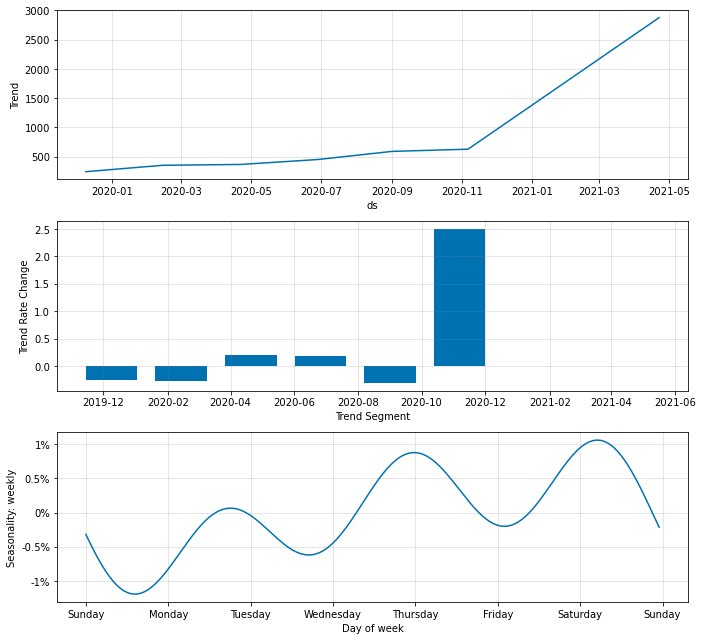

In [25]:
fig_param = model.plot_parameters()

In [33]:
df_return = hist['close']/hist['close'].shift(90)-1
df_return=df_return.dropna()
print(df_return)

time
2021-01-25    2.265641
2021-01-26    2.519356
2021-01-27    2.203566
2021-01-28    2.476800
2021-01-29    2.565763
                ...   
2021-04-21    1.121108
2021-04-22    0.945106
2021-04-23    0.920160
2021-04-24    0.591842
2021-04-25    0.665574
Name: close, Length: 91, dtype: float64


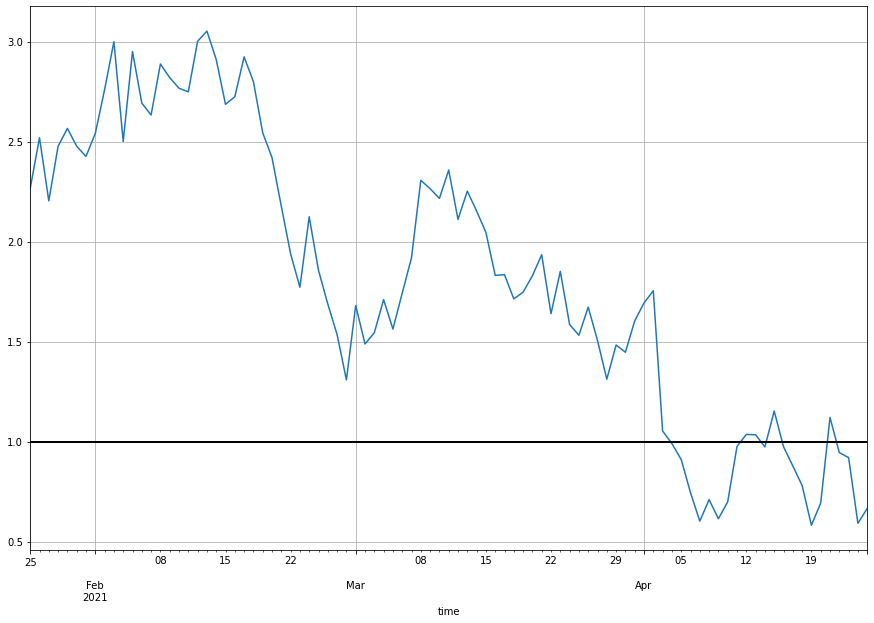

In [34]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

In [35]:
exp1 = hist['close'].ewm(span=12, adjust=False).mean()
exp2 = hist['close'].ewm(span=26, adjust=False).mean()

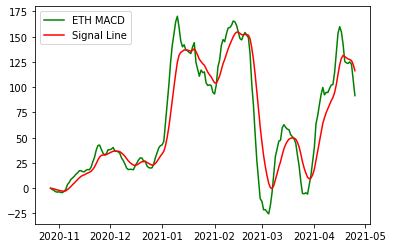

In [39]:
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.plot(hist.index, macd, label='ETH MACD', color = 'green')
plt.plot(hist.index, exp3, label='Signal Line', color='red')
plt.legend(loc='upper left')
plt.show()


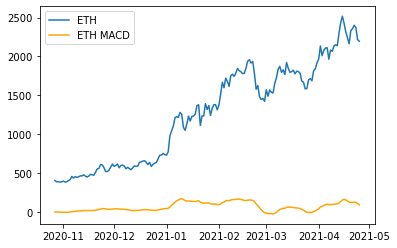

In [48]:
exp1 = hist['close'].ewm(span=12, adjust=False).mean()
exp2 = hist['close'].ewm(span=26, adjust=False).mean()
exp3 = hist['close'].ewm(span=9, adjust=False).mean()
macd = exp1-exp2
plt.plot(hist.index, hist['close'], label='ETH')
plt.plot(hist.index, macd, label='ETH MACD', color='orange')
#plt.plot(hist.index, exp3, label='Signal Line', color='Magenta')
plt.legend(loc='upper left')
plt.show()

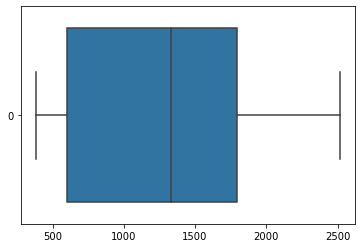

In [49]:
import seaborn as sns
ax = sns.boxplot(data=hist['close'], orient="h")

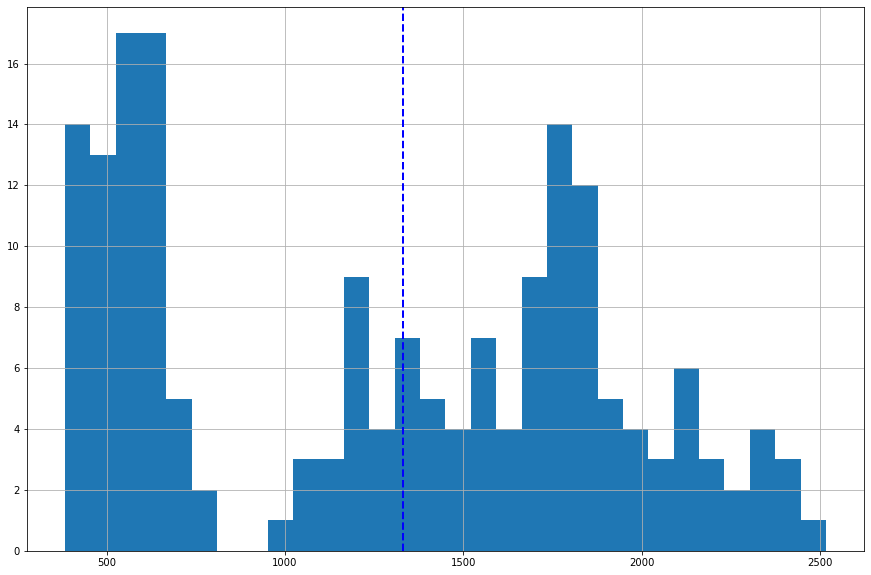

In [50]:
hist['close'].hist(bins=30, figsize=(15,10)).axvline(hist['close'].median(), color='b', linestyle='dashed', linewidth=2)